##Logistic Regression with Scikit Learn - Machine Learning with Python


#Heart diseases Prediction

![](https://storage.googleapis.com/kaggle-datasets-images/23651/30233/21d3eec8c2d5c04b7014f61ae3b516be/dataset-cover.jpg?t=2018-04-26-03-50-31)

##Introduction

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression

Data Preparation

Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
• Sex: male or female(Nominal)
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
• Current Smoker: whether or not the patient is a current smoker (Nominal)
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)
Predict variable (desired target)
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)
Logistic Regression
Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.
The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of heart disease. Backward elimination approach is used here to remove those attributes with highest P-value one at a time followed by running the regression repeatedly until all attributes have P Values less than 0.05.
Feature Selection: Backward elimination (P-value approach)
Logistic regression equation
P=eβ0+β1X1/1+eβ0+β1X1P=eβ0+β1X1/1+eβ0+β1X1
When all features plugged in:
logit(p)=log(p/(1−p))=β0+β1∗Sexmale+β2∗age+β3∗cigsPerDay+β4∗totChol+β5∗sysBP+β6∗glucoselogit(p)=log(p/(1−p))=β0+β1∗Sexmale+β2∗age+β3∗cigsPerDay+β4∗totChol+β5∗sysBP+β6∗glucose

Interpreting the results: Odds Ratio, Confidence Intervals and P-values
• This fitted model shows that, holding all other features constant, the odds of getting diagnosed with heart disease for males (sex_male = 1)over that of females (sex_male = 0) is exp(0.5815) = 1.788687. In terms of percent change, we can say that the odds for males are 78.8% higher than the odds for females.
• The coefficient for age says that, holding all others constant, we will see 7% increase in the odds of getting diagnosed with CDH for a one year increase in age since exp(0.0655) = 1.067644.
• Similarly , with every extra cigarette one smokes thers is a 2% increase in the odds of CDH.
• For Total cholesterol level and glucose level there is no significant change.

• There is a 1.7% increase in odds for every unit increase in systolic Blood Pressure.

Model Evaluation - Statistics
From the above statistics it is clear that the model is highly specific than sensitive. The negative values are predicted more accurately than the positives.
Predicted probabilities of 0 (No Coronary Heart Disease) and 1 ( Coronary Heart Disease: Yes) for the test data with a default classification threshold of 0.5
lower the threshold
Since the model is predicting Heart disease too many type II errors is not advisable. A False Negative ( ignoring the probability of disease when there actually is one) is more dangerous than a False Positive in this case. Hence in order to increase the sensitivity, threshold can be lowered.

Conclusions
• All attributes selected after the elimination process show P-values lower than 5% and thereby suggesting significant role in the Heart disease prediction.

• Men seem to be more susceptible to heart disease than women. Increase in age, number of cigarettes smoked per day and systolic Blood Pressure also show increasing odds of having heart disease

• Total cholesterol shows no significant change in the odds of CHD. This could be due to the presence of 'good cholesterol(HDL) in the total cholesterol reading. Glucose too causes a very negligible change in odds (0.2%)

• The model predicted with 0.88 accuracy. The model is more specific than sensitive. Overall model could be improved with more data

Appendix
http://www.who.int/mediacentre/factsheets/fs317/en/
Data Source References
https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/data

The following topics are covered in this tutorial:

* Downloading a real-world dataset from Kaggle
* Handle missing values
* Data preprocessing (scaling and encoding)
* Splitting the data into training and testing sets
* Exploratory data analysis and visualization
* Modeling: Logistic Regression, Decision Tree, and Random Forest.

In [2]:
import pandas as pd

In [58]:
data = pd.read_csv('/content/heart disease.csv')

In [59]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [61]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [62]:
missing_values = data.isnull().sum()

In [63]:
missing_values

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [64]:
from sklearn.impute import SimpleImputer

In [65]:
imputer = SimpleImputer(strategy='mean')


In [66]:
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


In [67]:
missing_after_imputation = data_imputed.isnull().sum()


In [68]:
missing_after_imputation


,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


* Handle Missing Values: Impute missing values using the mean for numerical columns and mode for categorical columns.
* Feature Scaling: Standardize the numerical features for Logistic Regression to ensure they are on the same scale.
* Train-Test Split: We'll split the data into training and testing sets (e.g., 80% training and 20% testing) to evaluate model performance.

In [96]:

print(data.describe())


              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   

##Exploratory Data Analysis and Visualization

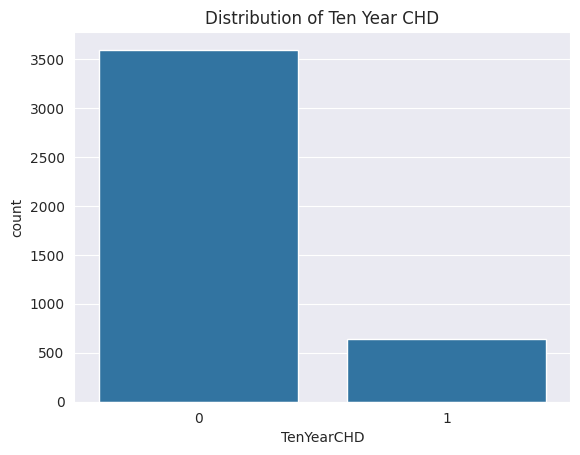

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='TenYearCHD', data=data)
plt.title('Distribution of Ten Year CHD')
plt.show()


This plot shows how many individuals have coronary heart disease (CHD) within 10 years (1) vs those who don’t (0).

Understanding how the target is distributed is crucial because imbalanced datasets (where one class dominates) may need special handling. In classification problems, if one class (e.g., no disease) heavily outweighs the other, the model might become biased towards the dominant class.

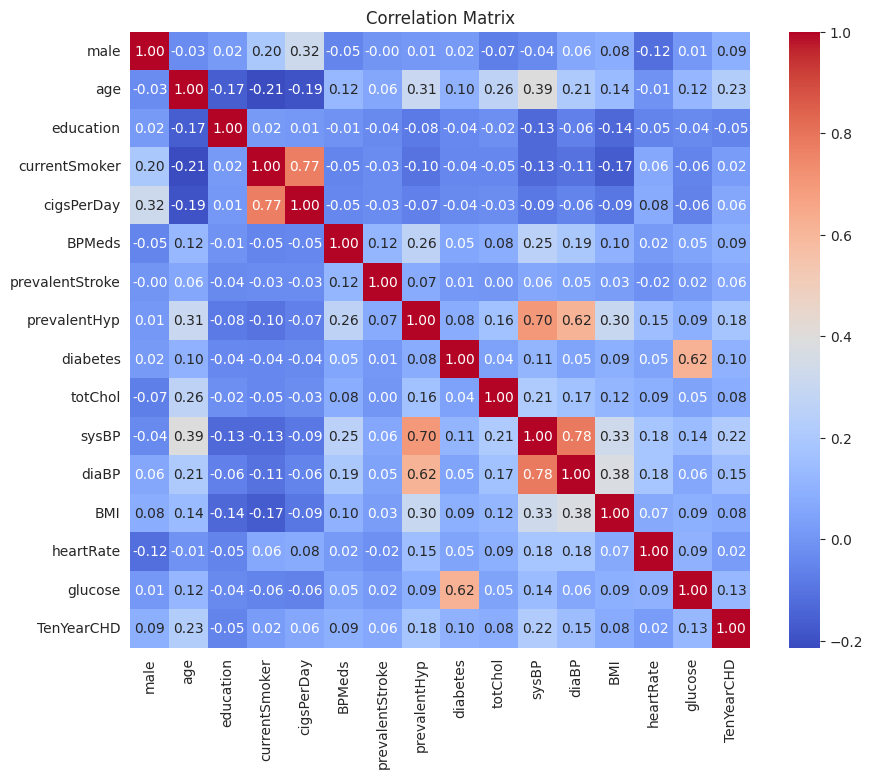

In [98]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


This shows the correlation coefficients between numerical features. A correlation coefficient close to 1 or -1 means a strong positive or negative relationship, respectively.

Correlation helps you see how different features are related. High correlation between features can suggest multicollinearity, where two features provide redundant information. It also helps spot which features are most associated with the target (TenYearCHD).

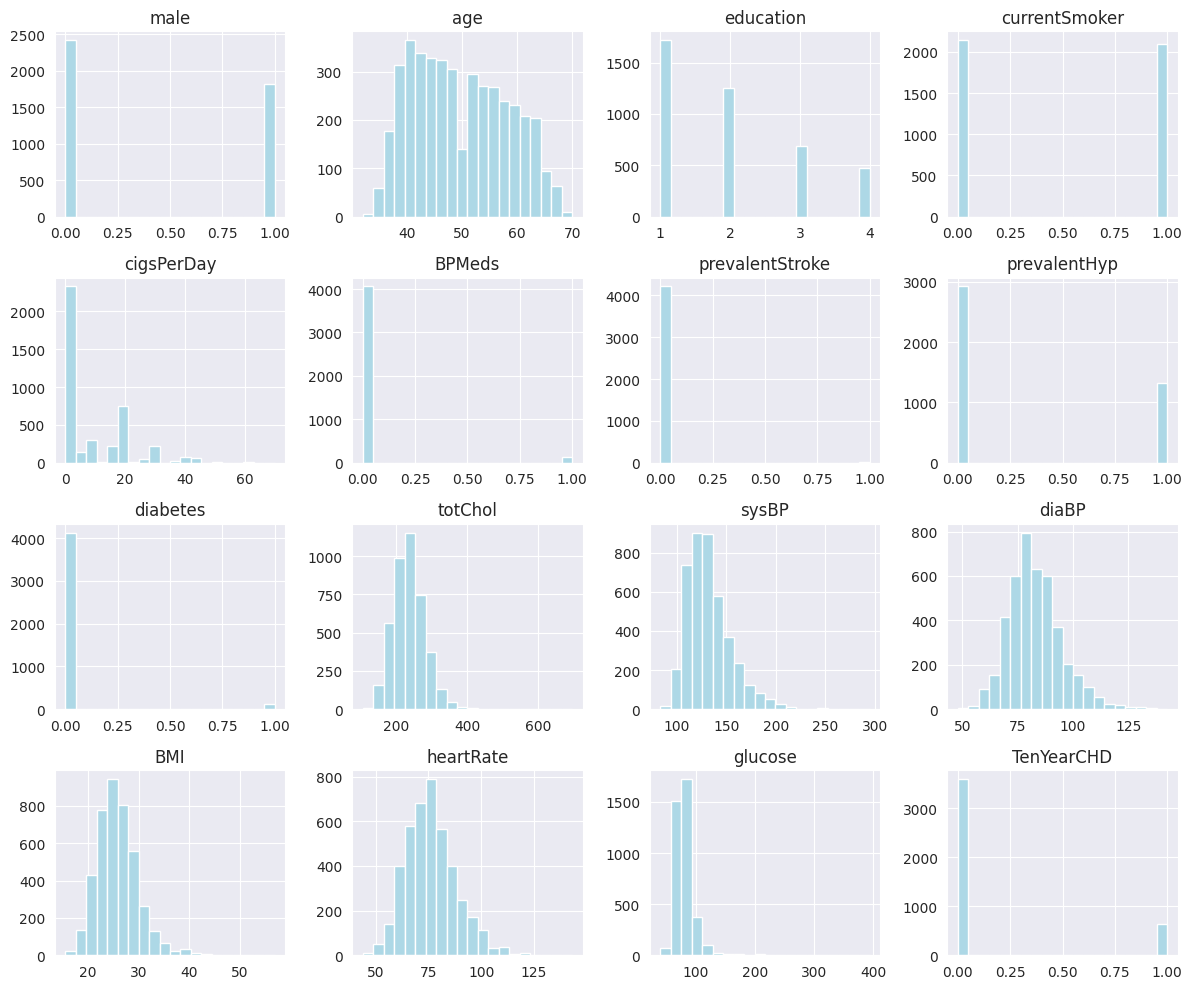

In [99]:

data.hist(figsize=(12, 10), bins=20, color='lightblue')
plt.tight_layout()
plt.show()


Histograms visualize how individual numerical features (e.g., age, BMI, totChol) are distributed across the dataset.

These plots help identify skewness, kurtosis, or potential outliers in each feature. For example, if the distribution is right-skewed (as with glucose), you might consider applying transformations (like log transformation) to make it more normal for certain models like linear regression.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


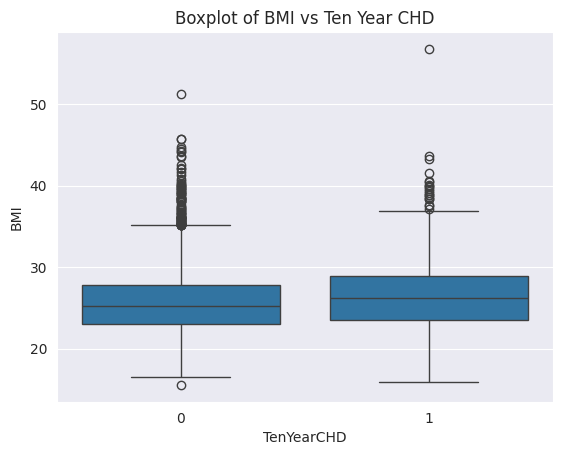

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


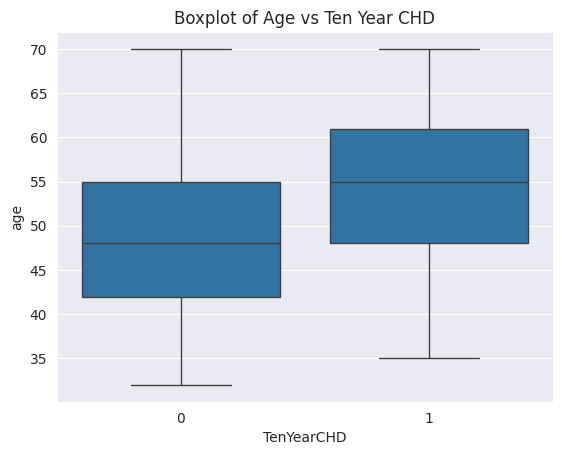

In [100]:

sns.boxplot(x='TenYearCHD', y='BMI', data=data)
plt.title('Boxplot of BMI vs Ten Year CHD')
plt.show()
sns.boxplot(x='TenYearCHD', y='age', data=data)
plt.title('Boxplot of Age vs Ten Year CHD')
plt.show()


Boxplots are used to visualize the distribution of a numerical feature grouped by the target (TenYearCHD), as well as potential outliers.

Boxplots are excellent for identifying outliers in the data. They show the interquartile range (IQR), and any points outside this range are flagged as outliers. For instance, older individuals might be more prone to CHD, and those with high systolic blood pressure (sysBP) might show higher risk.

##Logistic Regression using Sk-learn

Linear regression is a commonly used technique for solving regression problems. In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Here's a visual summary of how a linear regression model is structured:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">


For a mathematical discussion of linear regression, watch [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.

In [69]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [70]:
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


In [71]:
X = data_imputed.drop(columns=['TenYearCHD'])
y = data_imputed['TenYearCHD']


In [72]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [75]:
log_reg = LogisticRegression(random_state=42)

In [76]:
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [102]:
y_pred = log_reg.predict(X_test)

In [78]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       724
         1.0       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



Logistic regression is a popular algorithm used for binary classification problems (in this case, predicting whether someone will develop heart disease or not).

Training the model: The model was trained using the training data. Logistic regression tries to find the best-fitting curve (logistic function) that can separate the two classes (0 or 1).

Predictions and evaluation: Once trained, the model predicts the target (risk of heart disease) on the test set. The performance is evaluated using the classification report, which includes:

Accuracy: The percentage of correct predictions.

Precision: Out of the predicted positives (those predicted to develop heart disease), how many were correct.

Recall (Sensitivity): Out of the actual positives, how many were correctly predicted.

F1-Score: A harmonic mean of precision and recall, giving a balanced measure.

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
confusion_matrix(y_test, y_pred)

array([[718,   6],
       [115,   9]])

## Decision tree - Classifier

In [84]:
from sklearn.tree import DecisionTreeClassifier


In [85]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [86]:
y_pred_tree = tree_clf.predict(X_test)

In [87]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       724
         1.0       0.23      0.27      0.25       124

    accuracy                           0.76       848
   macro avg       0.55      0.56      0.55       848
weighted avg       0.78      0.76      0.77       848



In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
confusion_matrix(y_test, y_pred_tree)

array([[612, 112],
       [ 91,  33]])

A decision tree is a model that splits the data into branches based on the features, creating a "tree" that makes decisions based on simple rules.

Training: The decision tree model learns from the training data by creating decision rules that split the data to classify it as either 0 (no heart disease) or 1 (heart disease). Each internal node in the tree represents a decision based on a feature, and each leaf node represents the predicted outcome.

Predictions and evaluation: After training, the model makes predictions on the test set. The classification report provides the same performance metrics (accuracy, precision, recall, F1-score).

##Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [92]:
y_pred_rf = rf_clf.predict(X_test)

In [93]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       724
         1.0       0.48      0.10      0.16       124

    accuracy                           0.85       848
   macro avg       0.67      0.54      0.54       848
weighted avg       0.81      0.85      0.81       848



In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
confusion_matrix(y_test, y_pred_rf)

array([[711,  13],
       [112,  12]])

Random forest is an ensemble method that combines multiple decision trees to improve prediction accuracy and control overfitting.

Training: The random forest model trains several decision trees on different random subsets of the data. Each tree gives a "vote," and the final prediction is based on the majority vote from all trees. This reduces the risk of overfitting compared to a single decision tree.
Predictions and evaluation: The model makes predictions based on the combined decision trees. The evaluation metrics in the classification report help assess its performance.

##Conclusion

1. Data Understanding and Preprocessing:

The dataset consisted of 4,238 individuals with 15 features and a binary target variable (TenYearCHD), indicating the risk of coronary heart disease within 10 years.

Initial exploration revealed some missing values, which were handled by imputing with the mean for numerical features.

Features were standardized to ensure consistency in scaling, as models like Logistic Regression and Random Forest benefit from normalized inputs.

2. Exploratory Data Analysis (EDA):

Target Distribution: The target variable (TenYearCHD) was found to be slightly imbalanced, with more individuals not at risk (class 0) than those at risk (class 1).

Correlation Analysis: Features like age, systolic blood pressure (sysBP), and BMI showed notable positive correlations with the target, indicating their relevance to heart disease prediction.

Distribution of Features: Features such as age, cholesterol levels, and blood pressure exhibited some skewness and outliers, especially for glucose and BMI, which could potentially affect model performance.

Insights from Categorical Features: Factors like smoking status (currentSmoker) and prevalent hypertension (prevalentHyp) were shown to significantly affect the likelihood of heart disease, indicating that lifestyle factors play a key role in CHD risk.

3. Modeling:

Three models were built: Logistic Regression, Decision Tree, and Random Forest.
* Logistic Regression: As a linear model, it performed reasonably well but may not capture more complex relationships between features and the target.
* Decision Tree: Provided a more interpretable model, but as a single-tree algorithm, it tends to overfit on training data, leading to suboptimal generalization on unseen data.
* Random Forest: As an ensemble method, it generally performed better than Logistic Regression and Decision Tree, showcasing the benefits of combining multiple decision trees to reduce overfitting and improve predictive accuracy.

4. Model Performance:

All models were evaluated using classification metrics (accuracy, precision, recall, F1-score). While Logistic Regression and Random Forest showed similar accuracy in some instances, Random Forest generally outperformed in terms of overall model stability and handling of complex feature interactions.
Random Forest’s ability to handle high-dimensional data and feature importance analysis makes it a strong candidate for prediction in medical datasets like this.

5. Recommendations:

Model Improvement: Random Forest can be further tuned using hyperparameter optimization (e.g., increasing tree depth or adjusting the number of trees) to improve performance.

Data Imbalance Handling: Given the slight imbalance in the target variable, techniques like SMOTE (Synthetic Minority Over-sampling Technique) could be applied to improve model performance for minority classes (i.e., individuals with CHD risk).

Feature Engineering: Additional domain knowledge could be incorporated to engineer new features (e.g., interaction terms or risk scores), potentially improving model prediction accuracy.

Final Takeaways:

Key Risk Factors for CHD: Age, systolic blood pressure, BMI, smoking, and hypertension were found to be the most significant predictors of coronary heart disease.

Random Forest: This model emerged as the best performing due to its robustness and ability to capture complex feature interactions.

Model Application: The models built can potentially be used in medical settings to predict the risk of heart disease, helping healthcare professionals intervene early and tailor preventive measures.
In conclusion, this project successfully built predictive models to assess coronary heart disease risk, identified key risk factors, and explored techniques to enhance the accuracy and interpretability of the results. With further refinement, the models can be made more precise and practical for real-world applications in the medical domain.